#### Задание

Даны 2 таблицы:
* `index_data` – актуальную информацию об объектах;
* `parcel_aggr` – агрегированную информацию об отправлениях (за апрель 2017 года). 

**`index_data`**:
* `index_id` - Индекс отделения. `string`. `101000`;
* `area` - Регион, в котором располагается отделение. `string`. `Москва`;
* `population` - Население населенного пункта, в котором располагается отделение, тыс. человек. `int`. `17000`.

**`parcel_aggr`**:
* `parcel_id` - Уникальный идентификатор отправления. `string`. `EF103115172RU`;
* `accept_date` - Дата приема отправления. `string`. `2017-04-01`;
* `index_id`- Индекс отделения, где было принято отправление. `string`. `101000`;
* `mass` - Масса отправления в граммах. `int`. `512`;
* `price` - Оплаченный тариф за пересылку отправления в копейках. `int`. `75000`;
* `client_type` - Тип отправителя (Физическое/Юридическое лицо). `string`. `Физическое лицо`/`Юридическое лицо`.
___
* Вывести средний размер тарифа на пересылку и массы по индексам отделений, в которых было принято отправление.
* Вывести количество отправлений в разрезе индексов отделений, в которых было принято отправление. Учитывать только те отправления, у которых масса  больше  или равна 10 кг.
* Вывести  количество отправлений в разрезе  типа отправителя и группы по численности населения населенного пункта, в котором было принято отправление (меньше 50 тыс. (включительно), от 50 до 100 тыс. (включительно), от 100 до 500 тыс. (включительно), больше 500 тыс.).
* Вывести идентификатор отправления; регион, где было принято отправление; численность населения населенного пункта, в котором было принято отправление и стоимость пересылки отправления (в рублях) с максимальной массой в каждом филиале.
* Вывести идентификаторы отправлений, у которых  масса строго больше, чем в среднем по базе.
* Перед отпуском руководитель попросил вас: «вывести распределение количества отправлений по стоимости пересылки$^*$». Необходимо подготовить 1 слайд, который раскроет данную проблематику.
___
$^*$*Подсказка: задание творческое.  При выполнении задания можно создавать промежуточные таблицы - приложить код и описать графики, которые будут показаны на слайде*.     



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import sqlite3

База данных, коннекшен к базе данных и функция-обертка для формирования запросов к БД.

In [ ]:
con = sqlite3.connect('db')
cur = con.cursor()

In [ ]:
def select(sql):
    return pd.read_sql(sql, con)

Генерируем данные для таблицы `parcel_aggr`.

`id` посылки.

In [ ]:
parcel_aggr = pd.DataFrame({'parcel_id': range(100)})

Дата приема посылки.

In [ ]:
parcel_aggr['accept_date'] = (pd.Series(pd.date_range(start='2017-04-01', 
                                                      end='2017-04-30'))
                              .sample(100, 
                                      replace=True, 
                                      random_state=42) # Зафиксируем последовательность для последующего воспроизведения
                              .values)

Индекс отделения.

In [ ]:
parcel_aggr['index_id'] = pd.Series(range(10)).sample(100, 
                                                      replace=True, 
                                                      random_state=42).values

Масса посылки.

Сгенерируем массу из нормального распределения: среднее значение $=1000$, отклонение $=2000$. Чтобы избежать отрицательных значений - возьмем модуль.

In [ ]:
np.random.seed(42) # Зафиксируем сгенерированную последовательность для последующего воспроизведения

parcel_aggr['mass'] = pd.Series(np.abs(np.random.normal(10000, 
                                                        20000, 
                                                        size=100))).astype(int)

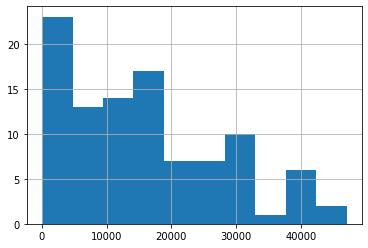

In [ ]:
parcel_aggr['mass'].hist();

Тариф за пересылку.

In [ ]:
np.random.seed(42)

parcel_aggr['price'] = np.round(np.abs(np.random.normal(10000, 
                                                        40000, 
                                                        size=100))).astype(int)

Тип клиента.

In [ ]:
parcel_aggr['client_type'] = (pd.Series(['Физическое лицо', 
                                         'Юридическое лицо'])
                              .sample(100, 
                                      replace=True, 
                                      random_state=42).values)

In [ ]:
parcel_aggr.head()

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-07,6,19934,29869,Физическое лицо
1,1,2017-04-20,3,7234,4469,Юридическое лицо
2,2,2017-04-29,7,22953,35908,Физическое лицо
3,3,2017-04-15,4,40460,70921,Физическое лицо
4,4,2017-04-11,6,5316,634,Физическое лицо


 Генерируем данные для таблицы `index_data`.
 
 Индекс отделения.

In [ ]:
index_data = pd.DataFrame({'index_id': range(10)})

Название города.

In [ ]:
index_data['area'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

Население населенного пункта.

In [ ]:
np.random.seed(42)

index_data['population'] = np.round(np.abs(np.random.normal(10000, 
                                                            40000, 
                                                            size=10))).astype(int)

In [ ]:
# Сгенерируем заново данные по объему населения в населенных пунктах, чтобы они удовлетворяли требованиям 3 задания

index_data['population'] = pd.Series([10000, 20002, 60000, 
                                      70000, 100001, 150000, 
                                      200000, 300000, 600000, 
                                      700000])

In [ ]:
index_data

,index_id,area,population
0,0,a,10000
1,1,b,20002
2,2,c,60000
3,3,d,70000
4,4,e,100001
5,5,f,150000
6,6,g,200000
7,7,h,300000
8,8,i,600000
9,9,j,700000


Зальем таблицы в базу данных.

In [ ]:
parcel_aggr.to_sql('parcel_aggr', 
                   con, 
                   if_exists='replace', 
                   index=False)

In [ ]:
index_data.to_sql('index_data', 
                  con, 
                  if_exists='replace', 
                  index=False)

In [ ]:
sql = '''
SELECT *

FROM parcel_aggr
'''

select(sql)

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-07 00:00:00,6,19934,29869,Физическое лицо
1,1,2017-04-20 00:00:00,3,7234,4469,Юридическое лицо
2,2,2017-04-29 00:00:00,7,22953,35908,Физическое лицо
3,3,2017-04-15 00:00:00,4,40460,70921,Физическое лицо
4,4,2017-04-11 00:00:00,6,5316,634,Физическое лицо
...,...,...,...,...,...,...
95,95,2017-04-29 00:00:00,9,19270,48541,Юридическое лицо
96,96,2017-04-18 00:00:00,8,15922,21845,Юридическое лицо
97,97,2017-04-26 00:00:00,6,15221,20442,Юридическое лицо
98,98,2017-04-12 00:00:00,8,10102,10205,Юридическое лицо


#### 1. Вывести средний размер тарифа на пересылку и массы по индексам отделений, в которых было принято отправление.

In [ ]:
sql = '''
SELECT p.index_id,
COUNT(p.index_id) parcels_count,
ROUND (AVG(p.mass)) avg_mass,
ROUND (AVG(p.price)) avg_price

FROM parcel_aggr p

GROUP BY p.index_id
'''

select(sql)

,index_id,parcels_count,avg_mass,avg_price
0,0,7,11164.0,16729.0
1,1,10,13596.0,28877.0
2,2,9,24728.0,43902.0
3,3,9,10928.0,18383.0
4,4,10,21650.0,41302.0
5,5,6,12980.0,26750.0
6,6,11,15031.0,24733.0
7,7,15,16840.0,32670.0
8,8,12,11452.0,20239.0
9,9,11,16969.0,31776.0


#### 2. Вывести количество отправлений в разрезе индексов отделений, в которых было принято отправление. Учитывать только те отправления, у которых масса больше или равна 10 кг.

In [ ]:
sql = '''
SELECT p.index_id,
COUNT(p.parcel_id) parcels_count,
AVG(p.mass) avg_mass,
AVG(p.price) avg_price

FROM parcel_aggr p

WHERE p.mass >= 10000

GROUP BY p.index_id
'''

select(sql)

,index_id,parcels_count,avg_mass,avg_price
0,0,4,17500.000000,25000.750000
1,1,7,17014.428571,35458.285714
2,2,9,24728.444444,43902.222222
3,3,3,24568.000000,39136.666667
4,4,6,32848.500000,59031.666667
5,5,3,19872.333333,43079.333333
6,6,7,21464.285714,35786.714286
7,7,9,26578.111111,47602.333333
8,8,7,17657.571429,28173.428571
9,9,8,21275.625000,42552.375000


Доля посылок с массой $>=10$ кг. от всех посылок на каждое отделение.

`CASE WHEN p.mass >= 10000 THEN 1 ELSE NULL END` - при `COUNT`, `NULL` не будет учитываться, если указать `0` - будет учитываться и придется использовать `SUM`.

In [ ]:
sql = '''
SELECT p.index_id,

-- Общее количество посылок на отделение
COUNT(p.parcel_id) parcels_count,

-- Выделим посылки с массой >= 10 кг.
COUNT(CASE WHEN p.mass >= 10000 THEN 1 ELSE NULL END) high_mass_parcels,

-- Доля посылок с массой >= 10 кг.
ROUND(COUNT(CASE WHEN p.mass >= 10000 THEN 1 ELSE NULL END) * 1.0 / 
    COUNT(p.parcel_id), 2) high_mass_parcels_ratio

FROM parcel_aggr p

GROUP BY p.index_id
'''

select(sql)

,index_id,parcels_count,high_mass_parcels,high_mass_parcels_ratio
0,0,7,4,0.57
1,1,10,7,0.70
2,2,9,9,1.00
3,3,9,3,0.33
4,4,10,6,0.60
5,5,6,3,0.50
6,6,11,7,0.64
7,7,15,9,0.60
8,8,12,7,0.58
9,9,11,8,0.73


#### 3. Вывести количество отправлений в разрезе типа отправителя и группы по численности населения населенного пункта, в котором было принято отправление (меньше 50 тыс. (включительно), от 50 до 100 тыс. (включительно), от 100 до 500 тыс. (включительно), больше 500 тыс.).

Мы не можем использовать `BETWEEN`, так как при его использовании обе границы попадут в интервал - $[50, 100]$.
А нам нужно, чтобы попала только первая - $(50, 100]$.

In [ ]:
sql = '''
SELECT
p.client_type,

-- Уровни по объему населения городов. Добавим в начало цифры, чтобы можно было отсортировать
CASE 
    WHEN i.population <= 50000 THEN '1. low' 
    WHEN i.population <= 100000 THEN '2. medium' 
    WHEN i.population <= 500000 THEN '3. high'
    ELSE '4. highest' 
    END as populaton_level,
COUNT(*) parcels_count

FROM parcel_aggr p

LEFT JOIN index_data i ON p.index_id = i.index_id

GROUP BY p.client_type, populaton_level

ORDER BY 1, 2'''

select(sql)

,client_type,populaton_level,parcels_count
0,Физическое лицо,1. low,9
1,Физическое лицо,2. medium,9
2,Физическое лицо,3. high,22
3,Физическое лицо,4. highest,4
4,Юридическое лицо,1. low,8
5,Юридическое лицо,2. medium,9
6,Юридическое лицо,3. high,20
7,Юридическое лицо,4. highest,19


#### 4. Вывести идентификатор отправления; регион, где было принято отправление; численность населения населенного пункта, в котором было принято отправление и стоимость пересылки отправления (в рублях) с максимальной массой в каждом филиале.

Через `GROUP BY()` и `MAX` по массе посылок на каждое отделение.

In [ ]:
sql = '''
SELECT p.parcel_id, 
i.index_id,
i.area,
i.population,
p.price,
MAX(p.mass) max_parcel_mass

FROM parcel_aggr p

LEFT JOIN index_data i ON p.index_id = i.index_id

GROUP BY i.index_id
'''

select(sql)

,parcel_id,index_id,area,population,price,max_parcel_mass
0,91,0,a,10000,48746,29372
1,64,1,b,20002,42501,26250
2,31,2,c,60000,84091,47045
3,47,3,d,70000,52285,31142
4,73,4,e,100001,72586,41292
5,14,5,f,150000,58997,24498
6,37,6,g,200000,68387,29193
7,74,7,h,300000,94790,42394
8,79,8,i,600000,69503,29751
9,65,9,j,700000,64250,37124


Оконной функцией `RANK()`.

Напомню:
- `RANK()` - проставляет однинаковым значениям одинаковый ранг с пропуском последующего значения, то есть после `1`, `1` идет не `2`, а `3`.
- `DENSE_RANK()` - делает аналогичное, но без пропуска последующих значений - `1`, `1`, `2`, `3`, `3`, `4` и тд.
- `ROW_NUMBER()` - просто проставляет номера строк в рамках `PARTITION`.

In [ ]:
sql = '''
SELECT p.parcel_id,
i.index_id,
i.area,
i.population,
p.price,
p.mass,
RANK() OVER (PARTITION BY i.index_id ORDER BY p.mass DESC) parcel_mass_rank

FROM parcel_aggr p

LEFT JOIN index_data i ON p.index_id = i.index_id

ORDER BY parcel_mass_rank ASC

LIMIT 10
'''

select(sql)

,parcel_id,index_id,area,population,price,mass,parcel_mass_rank
0,91,0,a,10000,48746,29372,1
1,64,1,b,20002,42501,26250,1
2,31,2,c,60000,84091,47045,1
3,47,3,d,70000,52285,31142,1
4,73,4,e,100001,72586,41292,1
5,14,5,f,150000,58997,24498,1
6,37,6,g,200000,68387,29193,1
7,74,7,h,300000,94790,42394,1
8,79,8,i,600000,69503,29751,1
9,65,9,j,700000,64250,37124,1


#### 5. Вывести идентификаторы отправлений, у которых масса строго больше, чем в среднем по базе.

Для средней массы по каждому отделению (что вообще-то логичнее).

In [ ]:
sql = '''WITH avg_mass_by_index_id AS(
SELECT *,
-- Средняя масса посылок по каждому отделению
ROUND(AVG(p.mass) OVER (PARTITION BY p.index_id), 2) avg_mass

FROM parcel_aggr p)

SELECT a.index_id,
a.parcel_id,
a.mass,
a.avg_mass

FROM avg_mass_by_index_id a

WHERE a.mass > a.avg_mass

ORDER BY a.index_id
'''

select(sql)

,index_id,parcel_id,mass,avg_mass
0,0,25,12218,11163.86
1,0,78,11835,11163.86
2,0,87,16575,11163.86
3,0,91,29372,11163.86
4,1,19,18246,13595.50
5,1,38,16563,13595.50
6,1,53,22233,13595.50
7,1,64,26250,13595.50
8,2,6,41584,24728.44
9,2,13,28265,24728.44


Как в задании - для средней массе по всем данным.

In [ ]:
sql = '''
SELECT p.parcel_id,
p.mass,
(SELECT AVG(p.mass) FROM parcel_aggr p) avg_mass

FROM parcel_aggr p

WHERE p.mass > (SELECT AVG(p.mass) FROM parcel_aggr p)

ORDER BY p.mass'''

select(sql)

,parcel_id,mass,avg_mass
0,96,15922,15714.1
1,17,16284,15714.1
2,50,16481,15714.1
3,38,16563,15714.1
4,87,16575,15714.1
5,58,16625,15714.1
6,48,16872,15714.1
7,81,17142,15714.1
8,70,17227,15714.1
9,68,17232,15714.1


#### 6. Перед отпуском руководитель попросил вас: «вывести распределение количества отправлений по стоимости пересылки». Необходимо подготовить 1 слайд, который раскроет данную проблематику.

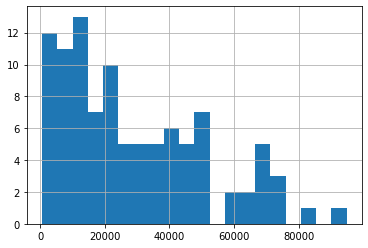

In [ ]:
parcel_aggr['price'].hist(bins=20);

In [ ]:
parcel_aggr['price_bin'] = pd.cut(parcel_aggr['price'], 10)

In [ ]:
parcel_aggr.groupby('price_bin')['parcel_id'].count()

price_bin
(522.827, 10034.3]    23
(10034.3, 19451.6]    20
(19451.6, 28868.9]    15
(28868.9, 38286.2]    10
(38286.2, 47703.5]    11
(47703.5, 57120.8]     7
(57120.8, 66538.1]     4
(66538.1, 75955.4]     8
(75955.4, 85372.7]     1
(85372.7, 94790.0]     1
Name: parcel_id, dtype: int64

In [ ]:
parcel_aggr['price'].describe()

count      100.00000
mean     28944.73000
std      22536.57919
min        617.00000
25%      10599.50000
50%      23200.50000
75%      43968.25000
max      94790.00000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


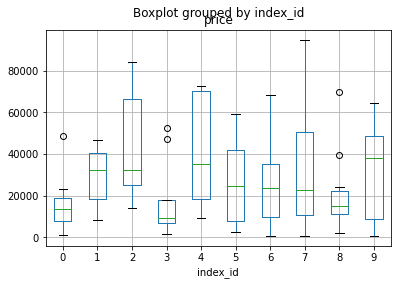

In [ ]:
parcel_aggr.boxplot('price', by='index_id');